# Liquidity Predictor
Welcome to the eighth lesson! This Jupyter Notebook file is meant to accompany **L08 - Liquidity Predictor.**

Type your solutions for each exercise in the code cells below, and then press **Shift + Enter** to execute your code. Then, check the solution video to see how you did!

### 1. Liquidity Predictor Introduction

### 2. Data Exploration

<font color = 'blue'> **EXERCISE 2.1** </font>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

liquidity_data = pd.read_csv('liquidity_data.csv')
liquidity_data.head(3)

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,28694.04271,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0
1,24784.00051,7,209150.6401,57909.0,-2021.0,15161.00019,12105.0,37727.0
2,24142.00013,6,180108.3453,32970.0,-1817.0,15818.99981,12604.0,192592.0


<font color = 'blue'> **EXERCISE 2.2** </font>

In [2]:
liquidity_data.describe()

,available_liquidity,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
count,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000,802.000000,802.000000
mean,3884.952199,3.017456,41645.089870,9040.720589,-1200.91799,3455.752891,1772.335973,20420.383638
std,4267.893247,1.851461,74046.522440,12112.161513,2066.29159,5679.466199,4207.345101,39483.422972
min,267.000000,0.000000,4282.810112,0.000000,-15858.00000,-6530.000000,-4888.000000,503.586000
25%,1288.328992,2.000000,10082.091010,2125.297000,-1241.00000,936.200000,232.923000,3791.525000
50%,2395.700000,3.000000,19349.403650,4562.000000,-512.00000,1695.700032,682.110000,8587.166000
75%,4512.458596,4.000000,41154.826240,10478.000000,-190.00000,3706.000000,1788.000000,18816.000000
max,28694.042710,10.000000,777070.706700,87032.000000,-5.04900,69715.000320,53244.000000,487511.000000


### 3. Splitting Data

**Lesson Workspace**

In [3]:
# Import train_test_split() from Scikit Learn's model_selection module
from sklearn.model_selection import train_test_split


<font color = 'blue'> **EXERCISE 3.1** </font>

In [4]:
# Define a Series named "target" containing only the target variable
target = liquidity_data.available_liquidity

# Define a DataFrame named "inputs" containing only the input features
inputs = liquidity_data.drop('available_liquidity', axis=1)


In [5]:
# Display the first row of target
target.head(1)


0    28694.04271
Name: available_liquidity, dtype: float64

In [6]:
# Display the first row of inputs
inputs.head(1)


,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
0,2,54856.1961,84628.0,-9262.0,21387.00032,9488.0,170315.0


**Lesson Workspace**

In [7]:
# Split your data and pass the results to a new object named "results"
results = train_test_split(inputs, target, test_size=0.2, random_state=1)


In [8]:
# Print the type() and len() of results
print(type(results))
print(len(results))
print('---')

# For each item in results, print the item's dimensions
for item in results :
    print(item.shape)


<class 'list'>
4
---
(641, 7)
(161, 7)
(641,)
(161,)


<font color = 'blue'> **EXERCISE 3.2** </font>

In [9]:
input_train, input_test, target_train, target_test = results
print(input_train.shape)
print(input_test.shape)
print(target_train.shape)
print(target_test.shape)

(641, 7)
(161, 7)
(641,)
(161,)


**Lesson Workspace**

In [10]:
input_train.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
309,3,16764.94643,1887.019,-483.002,1905.83296,859.71,8653.205


In [11]:
input_test.head(1)

,sp_score,market_cap,total_debt,ltm_capex,ltm_ebitda,ltm_fcf,ltm_revenue
8,8,172479.4798,24842.0,-1674.0,10841.00006,6830.0,39929.0


In [12]:
target_train.head(1)

309    1227.539
Name: available_liquidity, dtype: float64

In [13]:
target_test.head(1)

8    17708.00026
Name: available_liquidity, dtype: float64

### 4. Model Pipelines

**Lesson Workspace**

In [14]:
# Import required functions from Scikit-Learn
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create pipelines dictionary with model pipelines for Lasso and Ridge
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state = 1)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state = 1)),
}


In [15]:
# Add pipeline for Elastic Net
from sklearn.linear_model import ElasticNet

pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state = 1))


<font color = 'blue'> **EXERCISE 4.1** </font>

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 1))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 1))

**Lesson Workspace**

In [17]:
# Run this cell to verify that all 5 pipelines are properly defined
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


### 5. Hyperparameter Tuning

**Lesson Workspace**

In [18]:
# Create a hyperparameter grid for Lasso
lasso_hyperparameters = {
    'lasso__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}


<font color = 'blue'> **EXERCISE 5.1** </font>

In [19]:
# Create a hyperparameter grid for Ridge
ridge_hyperparameters = {
    'ridge__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5]
}

# Create a hyperparameter grid for Elastic Net
enet_hyperparameters = {
    'elasticnet__alpha' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}


<font color = 'blue'> **EXERCISE 5.2** </font>

In [20]:
# Create a hyperparameter grid for Random Forest
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 0.3, 0.6]
}

# Create a hyperparameter grid for Gradient Booster
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}


**Lesson Workspace**

In [21]:
# Create the hyperparameter_grids dictionary
hyperparameter_grids = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}


In [22]:
# Run the code below to make sure everything is set up correctly
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

enet was found, and it is a grid.
gb was found, and it is a grid.
ridge was found, and it is a grid.
rf was found, and it is a grid.
lasso was found, and it is a grid.


### 6. Cross Validation

**Lesson Workspace**

In [23]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

untrained_lasso_model = GridSearchCV(pipelines['lasso'], hyperparameter_grids['lasso'], cv=5)


<font color = 'blue'> **EXERCISE 6.1** </font>

In [24]:
models = {}

for key in pipelines.keys() :
    models[key] = GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=5)
    
models.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

<font color = 'blue'> **EXERCISE 6.2** </font>

In [25]:
for key in models.keys() :
    models[key].fit(input_train, target_train)
    print(key, ' is trained and tuned.')

lasso  is trained and tuned.
ridge  is trained and tuned.
enet  is trained and tuned.
rf  is trained and tuned.
gb  is trained and tuned.


### 7. Selecting a Winning Model

**Lesson Workspace**

In [26]:
# Import the r-squared and mean absolute error metrics
from sklearn.metrics import r2_score, mean_absolute_error


<font color = 'blue'> **EXERCISE 7.1** </font>

In [27]:
for key in models.keys():
    preds = models[key].predict(input_test)
    print(key)
    print('R-Squared: ', round(r2_score(target_test, preds), 3))
    print('MAE: ', round(mean_absolute_error(target_test, preds), 3))
    print('---')

lasso
R-Squared:  0.498
MAE:  1710.083
---
ridge
R-Squared:  0.5
MAE:  1708.062
---
enet
R-Squared:  0.501
MAE:  1706.04
---
rf
R-Squared:  0.852
MAE:  934.706
---
gb
R-Squared:  0.855
MAE:  588.249
---


<font color = 'blue'> **EXERCISE 7.2** </font>

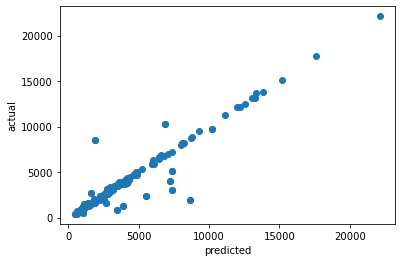

In [28]:
# Make prediction with test data
preds = models['gb'].predict(input_test)

# Plot predictions on x axis and actuals on y axis
plt.scatter(preds, target_test)

# Label axes and show graph
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()


In [29]:
client = pd.read_csv('C:\\Users\\zacha\\Desktop\\MLE Test\\ML 03. Module Files\\liquidity_client.csv')
models['gb'].predict(client)

FileNotFoundError: [Errno 2] File C:\Users\zacha\Desktop\MLE Test\ML 03. Module Files\liquidity_client.csv does not exist: 'C:\\Users\\zacha\\Desktop\\MLE Test\\ML 03. Module Files\\liquidity_client.csv'

In [ ]:
# Client prediction above will not precisely match lesson video due to updated Scikit Learn calculation methods